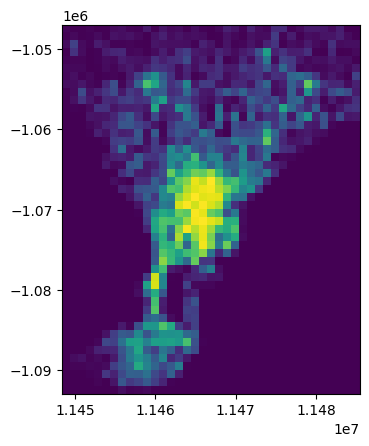

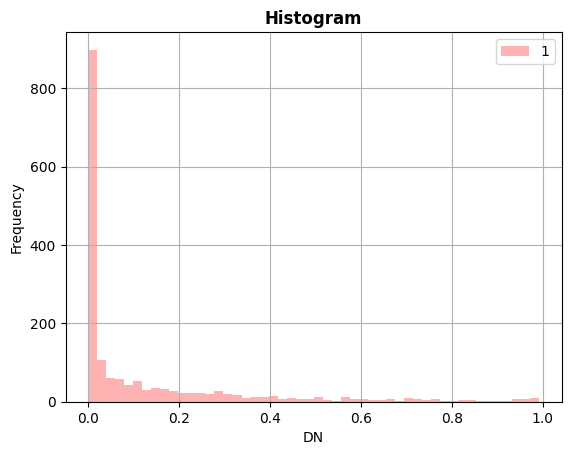

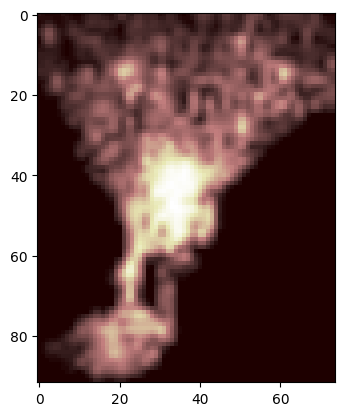

In [12]:
import rasterio
from rasterio.enums import Resampling
import rasterio.plot as rplot
import matplotlib.pyplot as plt

upscale_factor = 2

with rasterio.open('built_up_denpasar.tif') as dataset:
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )
    rplot.show(dataset)
    rplot.show_hist(dataset, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")
    
    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )
    plt.imshow(data[0], cmap='pink')
    plt.show()

    # show the transformed image and plot it
    with rasterio.open('upscaled.tif', 'w', driver='GTiff',
                       height=data.shape[1], width=data.shape[2],
                       count=dataset.count, dtype=data.dtype,
                       crs=dataset.crs, transform=transform) as dst:
        dst.write(data)

        